In [1]:
import sys
sys.path.append('../../')

import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import PandAnaTools.Fit.utils
from PandAnaTools.Fit import LocalTemplateFit
import scipy.optimize


In [97]:
nbins = 300
s, b0, b1, bins = PandAnaTools.Fit.utils.fake_templates(nbins, nsignal=4000, nbkgd0=5000, nbkgd1=5000)
total = s + b0 + b1
mock_data = np.random.poisson(1.2 * s + 0.8 * b0 + b1)
cov, inv = PandAnaTools.Fit.utils.cov_inv(PandAnaTools.Fit.utils.poisson_multiverse(total, nuniverses=100))
errors = np.sqrt(cov.diagonal() + 1 / total)

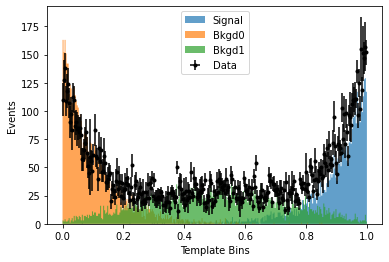

In [98]:
PandAnaTools.Fit.utils.plot_templates((s, b0, b1), ('Signal', 'Bkgd0', 'Bkgd1'), bins, data=mock_data, yerr=errors)


In [99]:
fit = LocalTemplateFit(cov, (s, b0, b1))

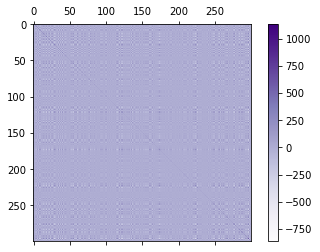

In [100]:
PandAnaTools.Fit.utils.plot_mat(cov)

In [101]:
fit.minimize(total)
#fit.MINOS(mock_data)

     fun: 0.7423504145345716
    k(V): 6.483751990452254e+20
 message: ['Maximum number of iteration reached']
    nfev: 6785
    nhev: 0
     nit: 1000
    njev: 930
  status: 0
 success: True
       x: array([0.99992257, 0.99994571, 0.99984232])